# BIG DATA & AI BOOTCAMP

### Big Data Track (3)
### Capstone Project ll
### 1st Notebook: Pre-processing Notebook 
#### Team Name: Desert Ninjas
#### Team Members:
1. Reema Alaswad
2. Maha  Alhazzani
3. Aljohara Alkanhal
4. Raghad Aleisa
5. Eman Aldosari

***

**Egypt's High School - grade 12 (ثانوية عامة) Public Results of the year 2022**

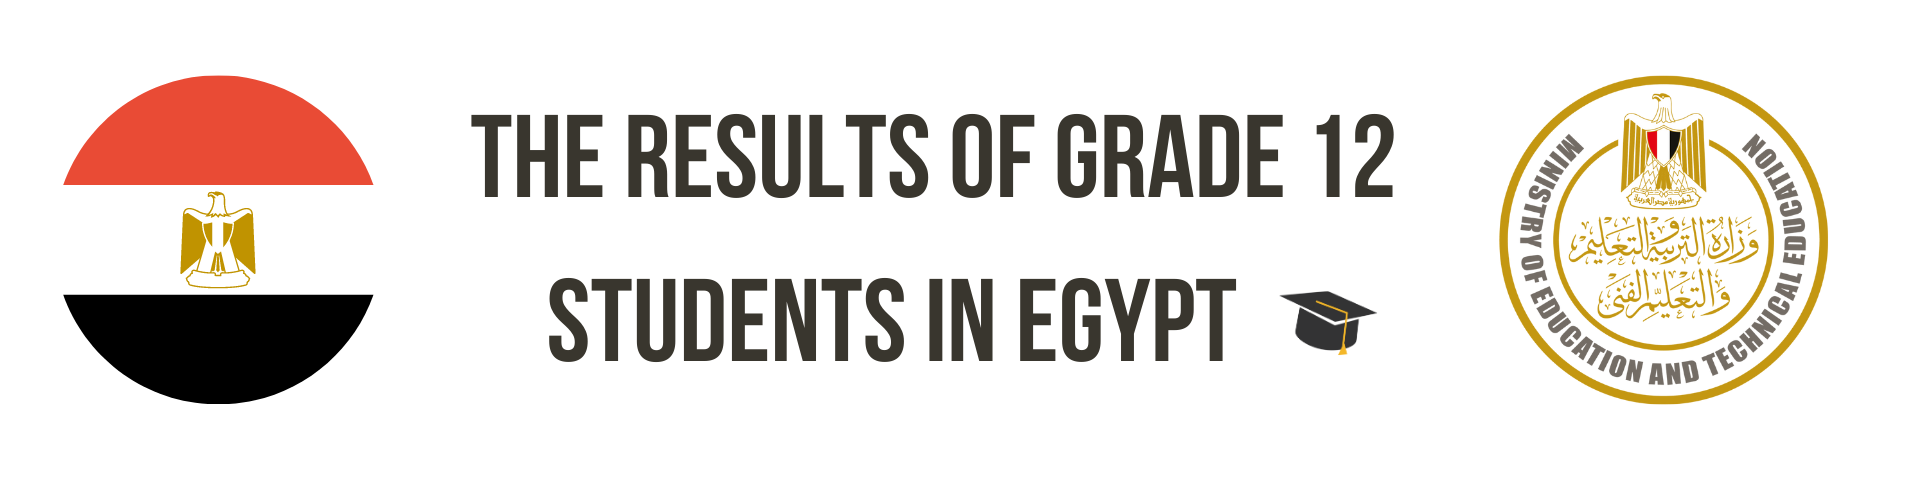

#### Project Objective:
The goal of this project is to forecast if the students can enroll in one of the public institutions in Egypt based on their current major and a few extracted attributes using data from a third-year secondary school dataset that was web scraped from the standardized tests in Egypt.
#### Dataset Description:
This dataset provides Egyptian student’s public results information. Including the student’s unique desk identifier number during the exam (this is unique for all students across Egypt), their gender and school name, the administration and the city their school belongs to, and how many test attempts they had. Lastly, for each attempt, it lists all the courses they can take depending on their branch and what score they have achieved for each course. Most of the courses will be calculated in the total score except for three courses; religion, national education, and economics Statistics. The dataset consists of 45 features and 683k records, which were taken for one year only; 2022.
#### Dataset Columns: 
| Feature | Description | Possibilities |
| :- | :- | :- |
| **Desk Number** | Student seat number (unique identifier) | Many possibilities |
| **School Name** | Student's school name | Many possibilities |
| **Administration** | Administration Area that the school belongs to | Many possibilities |
| **City** | Governate of school | Many possibilities |
| **Branch** | Student specialization branch | [Science - Health sciences,Science – Mathematics, Literature] |
| **Gender** | Student’s gender | [Female, Male] |
| **Number of Attempts** | Number of attempts allowed for each student | [First attempt only, Both attempts, Second attempt only] |
| | All of the following columns will be repeated for the second attempt students. | |
| **Percentage** | Student scoring percentage | 0-100% |
| **Status** | Student passing status | [Passed, second attempt, failed] |
| **Status 2nd** | Second attempt student passing status | [Passed, did not attend, failed] |
| **Arabic** | Arabic subject score | 0-80 |
| **First Foreign Language** | First foreign language subject score | 0-50 |
| **Second Foreign Language** | Second foreign language  subject score | 0-40 |
| **Pure Mathematics** | Pure mathematics subject score | 0-60 |
| **History** | History subject score | 0-60 |
| **Geography** | Geography subject score | 0-60 |
| **Philosophy** | Philosophy subject score | 0-60 |
| **Psychology** | Psychology subject score | 0-60 |
| **Chemistry** | Chemistry subject score | 0-60 |
| **Biology** | Biology subject score | 0-60 |
| **Geology** | Geology subject score | 0-60 |
| **Applied Math** | Applied mathematics subject score | 0-60 |
| **Physics** | Physics subject score | 0-60 |
| **Total** | The total score for the student | 0-410 |
| **Religion** | Religion subject score | 0-25 |
| **National Education** | National education subject score | 0-25 |
| **Economics Statistics** | Economics statistics subject score | 0-50 |


***
#### 🔺 1st Notebook: Pre-processing Notebook 🔺
1. Importing Packages
2. Dataset Loading
3. Data Exploration
4. Data Preprocessing
   - Dataset Translation
       - Manual Translation
       - Automatic Translation
           - Automatic translation mistakes cleaning
   - Missing Values Handling
   - Rename columns and change some columns value
   - Generate new columns
       - School type (Government school, International School)
       - Mixed School (Mixed, Girls only, Boys only)
       - Homeschooling School (Yes, No)
       - The number of subjects in which the student failed.
       - The final grade of the student (Excellent, Very good, Good, Acceptable, Weak, Very Weak)
   - Generate a target column (Label the dataset)
       - Can the student join the university, matching their current field of study? (Yes/No)
5. Final Result
    - Extract the final preprocessed dataset
***

### 1. Importing Packages

In [ ]:
!pip3 install pandas_profiling --upgrade

In [ ]:
# Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from pandas_profiling import ProfileReport
from collections import Counter

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

### 2. Dataset Loading

In [ ]:
#Loading the first dataset
df = pd.read_csv('High_School_Public_Results_2022_EG_both_attempts_translated.csv')

In [ ]:
#View the first dataset
df.head()

,desk_no,school_name,school_name_translated,administration,administration_translated,city,branch,Percentage,status,arabic,...,chemistry_2nd,biology_2nd,geology_2nd,applied_math_2nd,physics_2nd,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd,_merge
0,105410,الاورمان الرسمية لغات بنين,Official Orman for Boys Languages,الدقى,Dokki,الجيزة,أدبي,87.80,ناجح,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,105412,جمال عبد الناصرالرسمية لغات بنات,"Gamal Abdel Nasser, girls' languages",الدقى,Dokki,الجيزة,علمي علوم,57.32,ناجح,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,105413,هضبة الاهرام ث التجريبية لغات بنين,Al -Ahram Plateau Experimental Languages ​​of ...,الهرم,Pyramid,الجيزة,أدبي,83.41,ناجح,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,105415,التحرير الرسمية لغات بنين,Official editorial languages ​​Boys,أكتوبر,October,الجيزة,أدبي,53.17,ناجح,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,105416,التحرير الرسمية لغات بنين,Official editorial languages ​​Boys,أكتوبر,October,الجيزة,علمي رياضة,51.46,دور ثاني,56.0,...,30.0,NaN,NaN,33.0,31.0,225.0,18.0,20.0,31.0,both


### 3. Dataset Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683287 entries, 0 to 683286
Data columns (total 47 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   desk_no                    683287 non-null  int64  
 1   school_name                683287 non-null  object 
 2   school_name_translated     683287 non-null  object 
 3   administration             683287 non-null  object 
 4   administration_translated  683287 non-null  object 
 5   city                       683287 non-null  object 
 6   branch                     683287 non-null  object 
 7   Percentage                 682348 non-null  float64
 8   status                     682348 non-null  object 
 9   arabic                     678556 non-null  float64
 10  first_foreign_lang         677239 non-null  float64
 11  second_foreign_lang        676658 non-null  float64
 12  pure_mathematics           96729 non-null   float64
 13  history                    25

In [ ]:
df.shape

(683287, 47)

In [ ]:
df.branch.value_counts()

علمي علوم     326172
أدبي          259427
علمي رياضة     97688
Name: branch, dtype: int64

In [ ]:
df.city.value_counts()

القاهرة          102462
الجيزة            79619
الشرقية           49515
الدقهلية          47803
الاسكندرية        47231
القليوبية         42738
المنيا            38321
الغربية           35400
المنوفية          33995
البحيرة           33132
اسيوط             26242
كفر الشيخ         21424
سوهاج             21084
بني سويف          17841
الفيوم            16479
قنا               16141
دمياط             11644
الإسماعيلية        9270
اسوان              6978
الاقصر             6720
بورسعيد            4716
السويس             3958
شمال سيناء         3170
البحر الأحمر       2573
مطروح              2192
الوادي الجديد      1784
جنوب سيناء          855
Name: city, dtype: int64

In [ ]:
df.administration.value_counts()

المنتزه           14880
شرق الاسكندريه    10946
العمرانية         10326
المنيا             9467
وسط الاسكندريه     7480
                  ...  
أبورديس              39
مرسى علم             31
شلاتيــن             26
نخـــل               22
سانت كاتريـــن       19
Name: administration, Length: 287, dtype: int64

In [ ]:
df.status.value_counts()

ناجح        450945
دور ثاني    154940
راسب         76463
Name: status, dtype: int64

In [ ]:
df.describe()

,desk_no,Percentage,arabic,first_foreign_lang,second_foreign_lang,pure_mathematics,history,geography,philosophy,psychology,...,psychology_2nd,chemistry_2nd,biology_2nd,geology_2nd,applied_math_2nd,physics_2nd,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd
count,683287.000000,682348.000000,678556.000000,677239.000000,676658.000000,96729.000000,258155.000000,258427.000000,258334.000000,258297.000000,...,72836.000000,80510.000000,63585.000000,63628.000000,17107.000000,80430.000000,153833.000000,120938.000000,120966.000000,120631.000000
mean,515723.735325,63.135943,50.062461,32.910044,29.050685,37.210867,32.774366,33.131060,38.104295,37.719668,...,35.484843,31.872165,32.003539,36.420719,32.126147,30.866959,229.369485,17.900085,16.945150,27.329492
std,242736.831593,14.879646,11.531806,10.209850,8.289507,11.568325,9.712496,8.380363,8.076330,7.164803,...,5.195645,5.549049,4.700100,6.968903,5.997748,5.506799,23.097979,2.772456,2.941489,3.713741
min,105410.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,0.000000
25%,313296.500000,52.930000,40.000000,25.000000,22.000000,30.000000,30.000000,30.000000,32.000000,33.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,214.000000,16.000000,14.000000,25.000000
50%,505665.000000,62.680000,49.000000,33.000000,30.000000,37.000000,30.000000,31.000000,39.000000,38.000000,...,35.000000,30.000000,30.000000,35.000000,30.000000,30.000000,226.000000,18.000000,17.000000,25.000000
75%,719948.500000,73.660000,59.000000,41.000000,36.000000,46.000000,39.000000,38.000000,44.000000,43.000000,...,39.000000,31.000000,32.000000,41.000000,33.000000,30.000000,241.000000,20.000000,19.000000,29.000000
max,937412.000000,99.270000,80.000000,50.000000,40.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,59.000000,60.000000,392.000000,25.000000,25.000000,50.000000


In [ ]:
df.describe(exclude='number')

,school_name,school_name_translated,administration,administration_translated,city,branch,status,gender,status_2nd,_merge
count,683287,683287,683287,683287,683287,683287,682348,682500,153833,683287
unique,4334,4231,287,287,27,3,3,2,2,3
top,السعيدية الثانوية العسكرية,Saidia Military Secondary,المنتزه,the park,القاهرة,علمي علوم,ناجح,F,ناجح,left_only
freq,2778,2778,14880,14880,102462,326172,450945,378095,136385,529454


In [ ]:
df.shape

(683287, 47)

In [ ]:
report = ProfileReport(df)

print(repr(report.report))

report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Root


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

***
> #### ✨ The following can be summed up as a result of the data exploration step: 
- The dataset was initially two datasets that were combined, and "merge_" is a semantic column for the merging operation. 🧩
- The dataset mostly consists of exam results for Egyptian students who are in their final year of high school (grade 12). 👩🏻‍🎓👨🏻‍🎓🇪🇬
- We have 683,287 students with their exam and school information.📚
- We have 47 columns, 37 of which are numeric 🔢 and 10 categorical 🔡. 
- We have a large number of missing values, especially in the subject grades and in the whole second attempt part. We have to know why! ⚠️
- For grade 12 students, there are three main majors. 🎯
- There are 16 subjects in total and the same subjects were used for both attempts. But, one student taking exams for each of the sixteen disciplines is not normal, though! We must investigate and find the specialized subjects for each major, the general subjects, and whether they are included in the total/percentage calculation or not. 🧐
- The student's performance in both attempts is shown in three columns: ⭐️
     - Total: The sum of the grades of all the student’s subjects, which is out of 410.
     - Percentage: Following the computation of the total, the percentage will be determined using the following formula: $$ \frac{total}{410}\ * 100 $$
     - Status: Did the student pass or fail after adding up their total and percentage?
----------
> #### ✨ Subjects Information:

1. There are three majors for grade 12 students: Literature, Science "Health Sciences" and Science "Mathematics".

| Majors | 
| :-: |
|    **Literature 📚**     |
|    **Science "Health Sciences" 🫀**     |
|    **Science "Mathematics" 🔢**     |


2. We have 6 general subjects that all students of all majors must take: 

| Subject | Included in the final total |
| :- | :-: |
| **Arabic** | *Included* | 
| **First foreign language** | *Included* |
| **Second foreign language** | *Included* |
| **Religion** | *Not Included* |
| **National education** | *Not Included* |
| **Economics statistics** | *Not Included* |

- The first three subjects that are related to language subjects are important because they are counted in the final total of the students and have an impact on their percentage.  While the remaining subjects are sufficient to pass, regardless of the  final grade for each subject.
- In addition, The students' first foreign language subject is English, while the second foreign language is either Spanish, German, French or Italian.

3. Each major has four specialist subjects, this table lists the subjects that are associated to each major.

| Literature 📚 | Science "Health Sciences" 🫀 | Science "Mathematics" 🔢 |
| :-: | :-: | :-: |
| **History** | **Chemistry** | **Chemistry** |
| **Philosophy** | **Physics** | **Physics** |
| **Psychology** | **Biology** | **Applied Mathematics** |
| **Geography** | **Geology** | **Pure Mathematics** |

***

### 4. Data Preprocessing 

#### 4.1 Data Translation 
We have 8 categorical columns in the dataset that need to be translated from Arabic into English.  So we translated these columns using two methods;  Manual and automatic translation. 🔡

##### 4.1.1 Manual Translation 
The columns that have few and reasonable possibilities to be translated manually are: branch, status, status_2nd and city.

In [ ]:
# View branch column possibilities.
df.branch.value_counts()

علمي علوم     326172
أدبي          259427
علمي رياضة     97688
Name: branch, dtype: int64

In [ ]:
# Translate the branch column manually.
df['branch'] = df['branch'].replace(['أدبي'], 'Literature')
df['branch'] = df['branch'].replace(['علمي علوم'], 'Science - Health sciences')
df['branch'] = df['branch'].replace(['علمي رياضة'], 'Science - Mathematics')

In [ ]:
# The result after the manual translation of branch column.
df.branch.value_counts()

Science - Health sciences    326172
Literature                   259427
Science - Mathematics         97688
Name: branch, dtype: int64

✨ In high school in Egypt, there are three academic branches for students to choose from: literature, science (health sciences), or science (mathematics).

In [ ]:
# View status column possibilities.
df.status.value_counts()

ناجح        450945
دور ثاني    154940
راسب         76463
Name: status, dtype: int64

In [ ]:
# Translate the status column manually.
df['status'] = df['status'].replace(['ناجح'], 'Passed')
df['status'] = df['status'].replace(['راسب'], 'Failed')
df['status'] = df['status'].replace(['دور ثاني'], 'Second attempt')

In [ ]:
# The result after the manual translation of status column.
df.status.value_counts()

Passed            450945
Second attempt    154940
Failed             76463
Name: status, dtype: int64

✨ There are three possible outcomes for students status (in the first attempt) when grades are calculated: either they pass, need a second chance, or fail.

💡 Note: The Egyptian Ministry of Education requires that students who fail one or more courses in the first round of exams take those courses' tests again in the second round. Failure in more than two courses results in failure of the entire academic year, which must be repeated. Additionally, students who did not show up for all of the first attempt tests due to exceptional circumstances that the Ministry of Education has approved are permitted to take the exams again.

In [ ]:
# View status_2nd column possibilities.
df.status_2nd.value_counts()

ناجح    136385
راسب     17448
Name: status_2nd, dtype: int64

In [ ]:
# Translate the status_2nd column manually.
df['status_2nd'] = df['status_2nd'].replace(['ناجح'], 'Passed')
df['status_2nd'] = df['status_2nd'].replace(['راسب'], 'Failed')

In [ ]:
# The result after the manual translation of status_2nd column.
df.status_2nd.value_counts()

Passed    136385
Failed     17448
Name: status_2nd, dtype: int64

✨ There are two possible outcomes for students status (in the second attempt) when grades are calculated: either they pass, or fail.

In [ ]:
# View city column possibilities.
df.city.value_counts()

القاهرة          102462
الجيزة            79619
الشرقية           49515
الدقهلية          47803
الاسكندرية        47231
القليوبية         42738
المنيا            38321
الغربية           35400
المنوفية          33995
البحيرة           33132
اسيوط             26242
كفر الشيخ         21424
سوهاج             21084
بني سويف          17841
الفيوم            16479
قنا               16141
دمياط             11644
الإسماعيلية        9270
اسوان              6978
الاقصر             6720
بورسعيد            4716
السويس             3958
شمال سيناء         3170
البحر الأحمر       2573
مطروح              2192
الوادي الجديد      1784
جنوب سيناء          855
Name: city, dtype: int64

In [ ]:
# Translate the city column manually for 27 city.
df['city'] = df['city'].replace(['القاهرة'], 'Cairo')
df['city'] = df['city'].replace(['الجيزة'], 'Giza')
df['city'] = df['city'].replace(['الشرقية'], 'Sharqia')
df['city'] = df['city'].replace(['الدقهلية'], 'Dakahlia')
df['city'] = df['city'].replace(['الاسكندرية'], 'Alexandria')
df['city'] = df['city'].replace(['القليوبية'], 'Qalyubiyya')
df['city'] = df['city'].replace(['المنيا'], 'Minya')
df['city'] = df['city'].replace(['الغربية'], 'Gharbia')
df['city'] = df['city'].replace(['المنوفية'], 'Monufia')
df['city'] = df['city'].replace(['البحيرة'], 'Beheira')
df['city'] = df['city'].replace(['اسيوط'], 'Assiut')
df['city'] = df['city'].replace(['كفر الشيخ'], 'Kafr El Sheikh')
df['city'] = df['city'].replace(['سوهاج'], 'Sohaj')
df['city'] = df['city'].replace(['بني سويف'], 'Beni Suef')
df['city'] = df['city'].replace(['الفيوم'], 'Faiyum')
df['city'] = df['city'].replace(['قنا'], 'Qena')
df['city'] = df['city'].replace(['دمياط'], 'Damietta')
df['city'] = df['city'].replace(['الإسماعيلية'], 'Ismailia')
df['city'] = df['city'].replace(['اسوان'], 'Aswan')
df['city'] = df['city'].replace(['الاقصر'], 'Luxor')
df['city'] = df['city'].replace(['بورسعيد'], 'Port Said')
df['city'] = df['city'].replace(['السويس'], 'Suez')
df['city'] = df['city'].replace(['شمال سيناء'], 'North Sinai')
df['city'] = df['city'].replace(['البحر الأحمر'], 'Red Sea')
df['city'] = df['city'].replace(['مطروح'], 'Matrouh')
df['city'] = df['city'].replace(['الوادي الجديد'], 'New Valley')
df['city'] = df['city'].replace(['جنوب سيناء'], 'South Sinai')

In [ ]:
# The result after the manual translation of city column.
df.city.value_counts()

Cairo             102462
Giza               79619
Sharqia            49515
Dakahlia           47803
Alexandria         47231
Qalyubiyya         42738
Minya              38321
Gharbia            35400
Monufia            33995
Beheira            33132
Assiut             26242
Kafr El Sheikh     21424
Sohaj              21084
Beni Suef          17841
Faiyum             16479
Qena               16141
Damietta           11644
Ismailia            9270
Aswan               6978
Luxor               6720
Port Said           4716
Suez                3958
North Sinai         3170
Red Sea             2573
Matrouh             2192
New Valley          1784
South Sinai          855
Name: city, dtype: int64

##### 4.1.2 Automatic Translation 
The remaining two columns need to be translated are the school_name and the administration, but the number of possibilities is too many and it is difficult to be translated manually;  We have more than **4,000** *school names* and **287** *administrative districts*.
- We used Google automatic translatation tool instead of doing manual translation, and the process was straightforward. <br> Google Sheets ➜ Functions ➜ GOOGLETRANSLATE Function

- Function Syntax: <br>
GOOGLETRANSLATE(text, [source_language, target_language])

The process is depicted in the next image. <br>
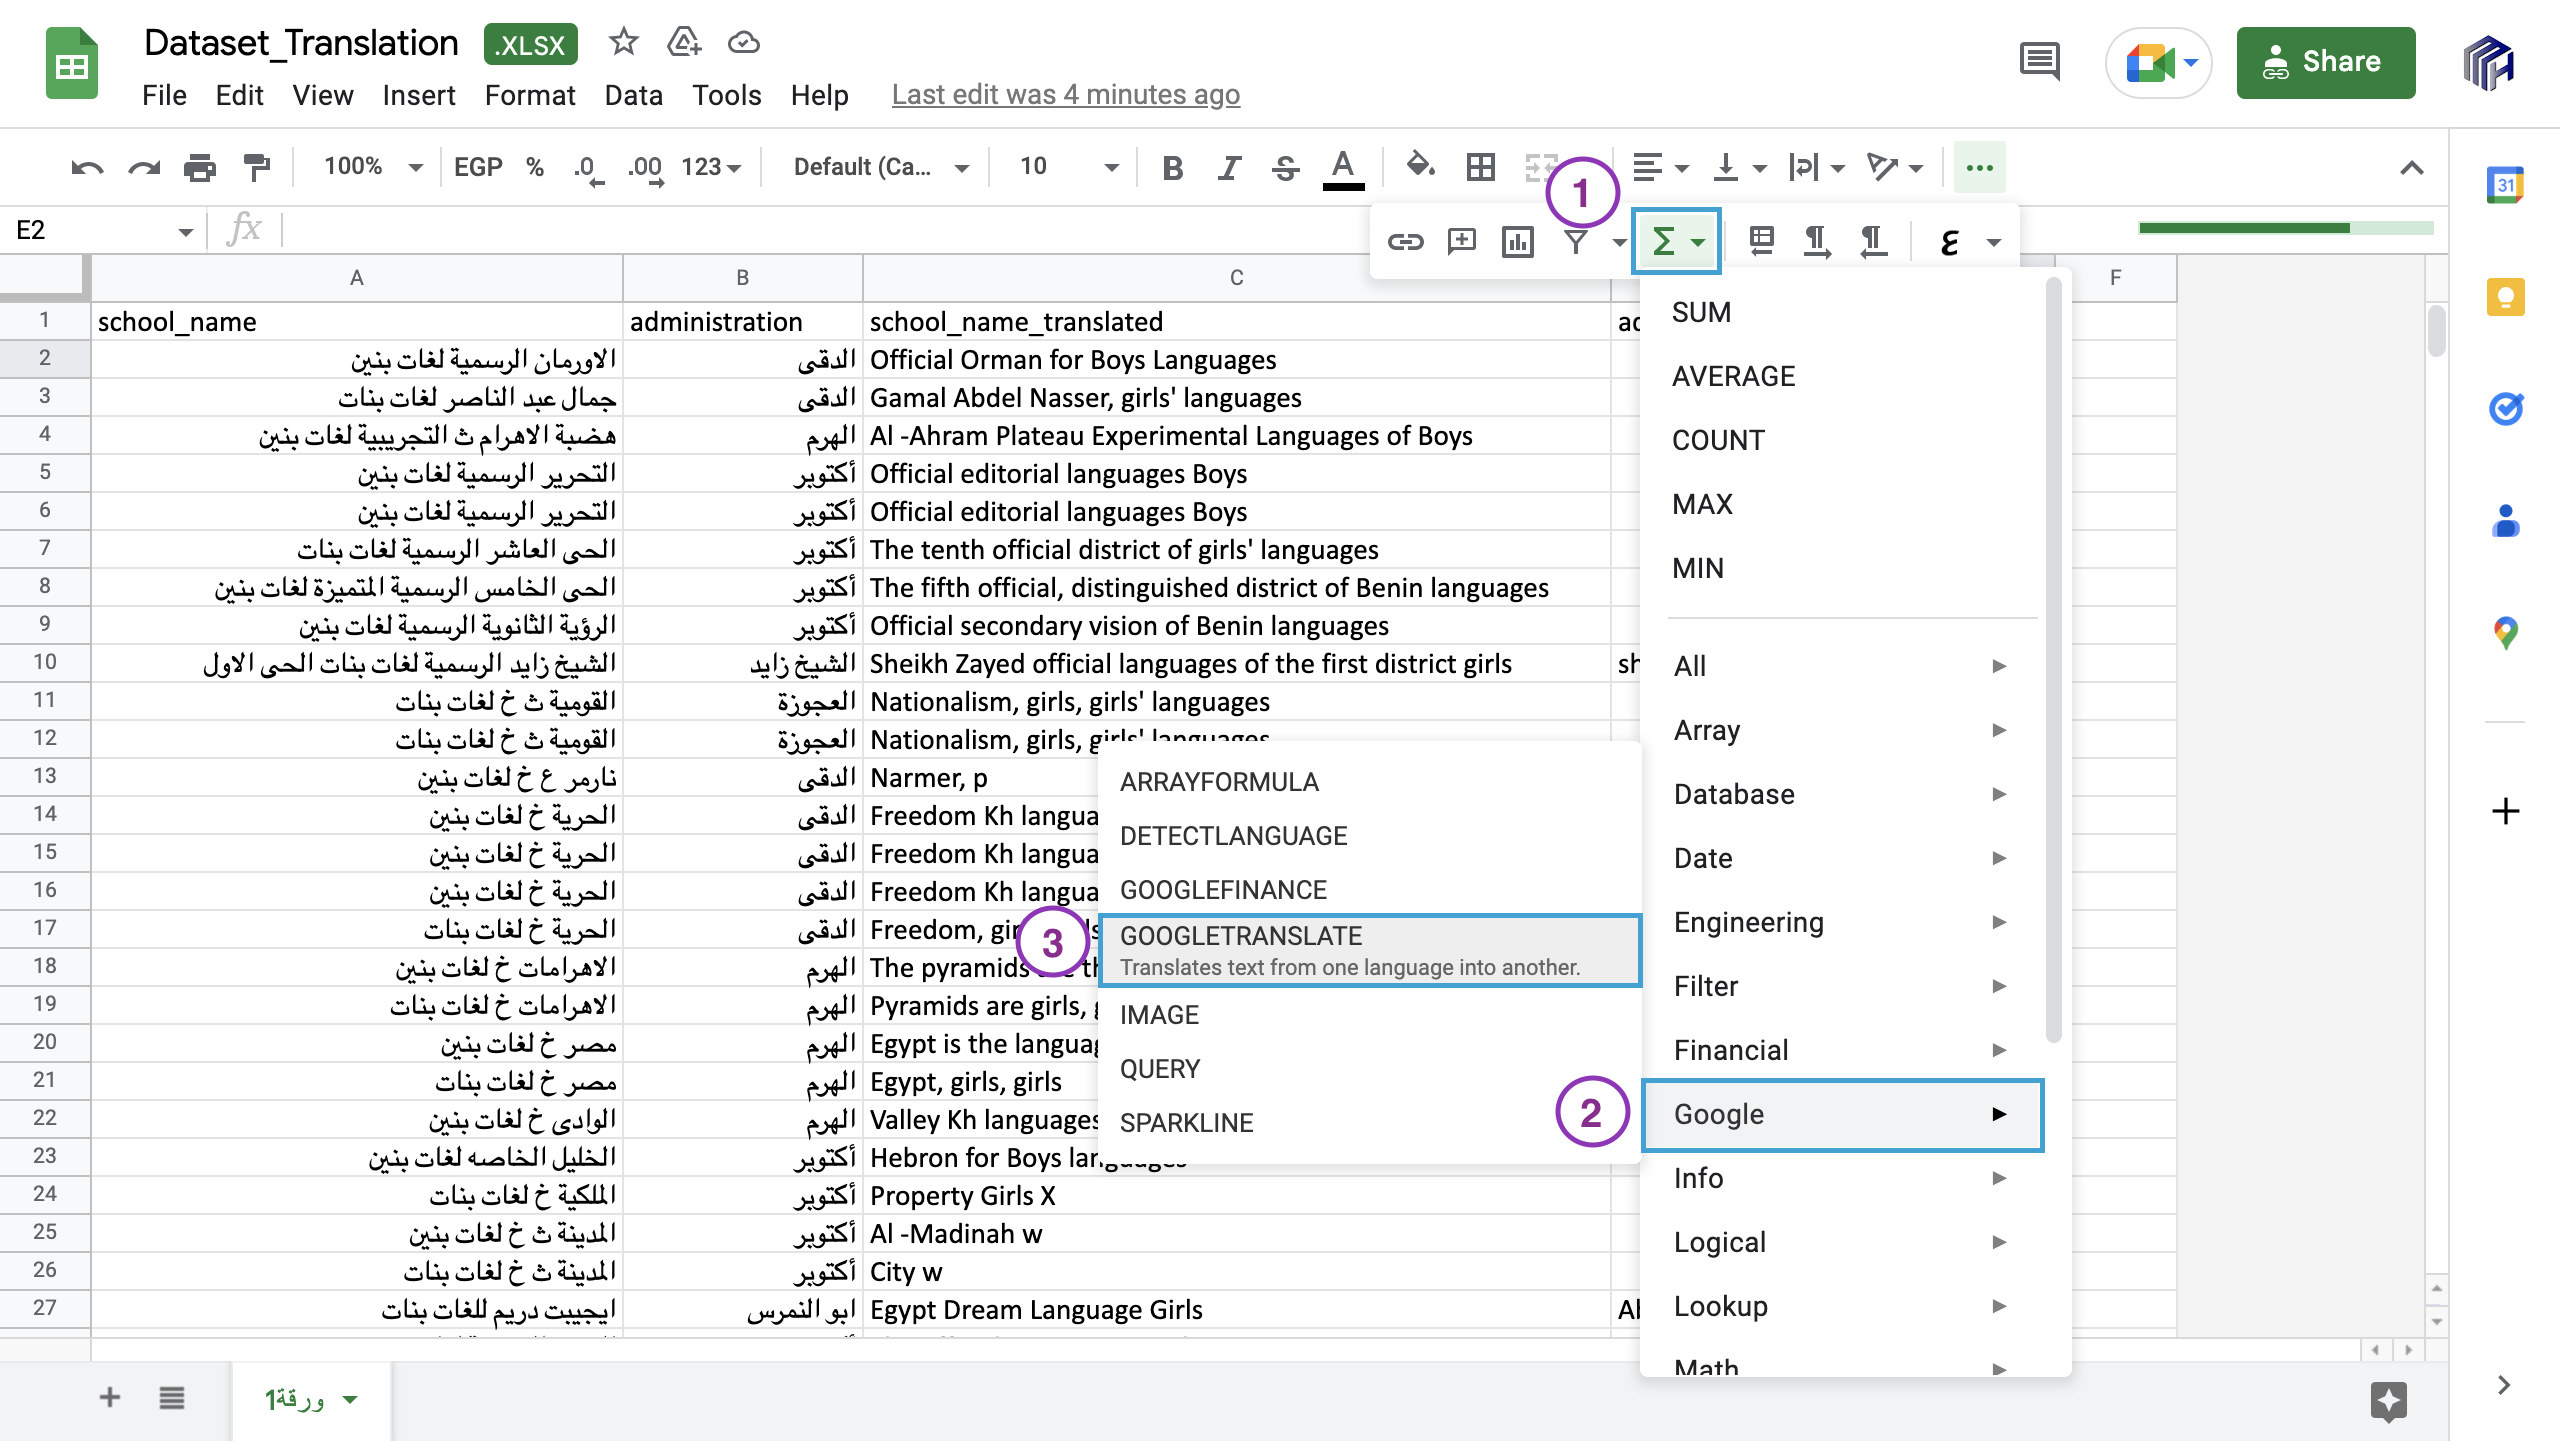
After the automatic translation we noticed that the tool is sometimes a literal translator, thus there are certain mistranslation issues that need to be corrected after translation.

##### 4.1.2.1 Automatic translation mistakes cleaning

In [ ]:
# All school names will be changed to lowercase in order to speed up the cleanup process and minimize the possibilities. 
# For example, if we want to clean the word Benin, we will write it Benin and benin. Therefore the number of codes and possibilities will be doubled.
df.school_name_translated=df.school_name_translated.str.lower()


In [ ]:
# View the column before cleaning the mistranslation mistakes.
df.school_name_translated

0                         official orman for boys languages
1                      gamal abdel nasser, girls' languages
2         al -ahram plateau experimental languages ​​of ...
3                       official editorial languages ​​boys
4                       official editorial languages ​​boys
                                ...                        
683282            maher sayed hamdan joint secondary school
683283                        sons of the joint high school
683284                          al -wasiti common secondary
683285                         abu tej administration homes
683286                       al -ghanayem management houses
Name: school_name_translated, Length: 683287, dtype: object

In [ ]:
# Convert the mistranslation of "benin" to "boys" with whitespace consideration.
df.school_name_translated=df.school_name_translated.str.replace(" benin ", " boys ", regex=True)
df.school_name_translated=df.school_name_translated.str.replace(" benin", " boys", regex=True)

In [ ]:
# Convert the mistranslation of "languages" to "international school" with whitespace consideration.
df.school_name_translated=df.school_name_translated.str.replace(" languages ", " international school ", regex=True)
df.school_name_translated=df.school_name_translated.str.replace(" languages", " international school", regex=True)

In [ ]:
# We noticed that there was a translation error made by the automatic tool, as when it translated the word from Arabic 
# into English, it did not translate it correctly and kept it as “girls,” with the comma, which is basically supposed, 
# if translated literally, to be at least “languages”. 
df.school_name_translated=df.school_name_translated.str.replace(" girls, ", " international school ", regex=True)


In [ ]:
# Clean the useless words in the translated school name column.
df.school_name_translated=df.school_name_translated.str.replace(" are ", " ", regex=True)
df.school_name_translated=df.school_name_translated.str.replace(" is ", " ", regex=True)
df.school_name_translated=df.school_name_translated.str.replace(" w ", " ", regex=True)
df.school_name_translated=df.school_name_translated.str.replace(" kh ", " ", regex=True)
df.school_name_translated=df.school_name_translated.str.replace(",", " ", regex=True)

In [ ]:
# View the dataset after the automatic translation mistakes cleaning process.
df.head(20)

,desk_no,school_name,school_name_translated,administration,administration_translated,city,branch,Percentage,status,arabic,...,chemistry_2nd,biology_2nd,geology_2nd,applied_math_2nd,physics_2nd,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd,_merge
0,105410,الاورمان الرسمية لغات بنين,official orman for boys international school,الدقى,Dokki,Giza,Literature,87.80,Passed,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,105412,جمال عبد الناصرالرسمية لغات بنات,gamal abdel nasser girls' international school,الدقى,Dokki,Giza,Science - Health sciences,57.32,Passed,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,105413,هضبة الاهرام ث التجريبية لغات بنين,al -ahram plateau experimental international s...,الهرم,Pyramid,Giza,Literature,83.41,Passed,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,105415,التحرير الرسمية لغات بنين,official editorial international school ​​boys,أكتوبر,October,Giza,Literature,53.17,Passed,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,105416,التحرير الرسمية لغات بنين,official editorial international school ​​boys,أكتوبر,October,Giza,Science - Mathematics,51.46,Second attempt,56.0,...,30.0,NaN,NaN,33.0,31.0,225.0,18.0,20.0,31.0,both
5,105417,الحى العاشر الرسمية لغات بنات,the tenth official district of girls' internat...,أكتوبر,October,Giza,Literature,93.66,Passed,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,105418,الحى الخامس الرسمية المتميزة لغات بنين,the fifth official distinguished district of ...,أكتوبر,October,Giza,Literature,79.02,Passed,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7,105419,الرؤية الثانوية الرسمية لغات بنين,official secondary vision of boys internationa...,أكتوبر,October,Giza,Science - Health sciences,65.37,Passed,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8,105420,الشيخ زايد الرسمية لغات بنات الحى الاول,sheikh zayed official international school ​​o...,الشيخ زايد,sheikh Zayed,Giza,Literature,71.46,Passed,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,105421,القومية ث خ لغات بنات,nationalism international school girls' inter...,العجوزة,Agouza,Giza,Literature,86.83,Passed,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


#### 4.2 Missing Values Handling 

In [ ]:
# Calculate the number of null values in the dataset.
df.isnull().sum()

desk_no                           0
school_name                       0
school_name_translated            0
administration                    0
administration_translated         0
city                              0
branch                            0
Percentage                      939
status                          939
arabic                         4731
first_foreign_lang             6048
second_foreign_lang            6629
pure_mathematics             586558
history                      425132
geography                    424860
philosophy                   424953
psychology                   424990
chemistry                    264934
biology                      360852
geology                      360511
applied_math                 586482
physics                      265399
total                           939
religion                      72739
national_education            72547
economics_statistics          73158
gender                          787
Percentage_2nd              

#### Why do we have so many missing values? ⚠️
We can see that we have a huge number of missing values.  And as we know our dataset is the student score results for the two attempts.  Here we raise the question, why do we have this huge number of missing values then? 🧐

- We know that we have three columns that measure the students' performance for both attempts and we know that attendance at the first attempt is compulsory for students, and based on their score we can decide whether they are eligible for a second chance or not.  
    - The fact that there are 939 missing values for each of the performance measurement columns for this student in the first attempt (total, %, status) shows that there are no scores to be collected, no percentages to be derived, and no report for the student's final status! Thus, we get the conclusion that there are 939 students who did not attempt the tests of the first attempt. After some consideration, we suggested that perhaps they had special excuses for skipping the first attempt exams that were approved by their schools, which is why their records are missing.

- Additionally, we have 529 thousand missing data from the columns used to measure students' performance on the second attempt. This was expected by us because it shows that the majority of students were successful on the first attempt.

- With regard to the various missing values in the subject grades, we think that this is due to the students' various areas of expertise. A student with a literature concentration is exempt from attending the exams for the subjects in a health sciences concentration, and so forth.

In [ ]:
# Filling all of the missing values of the grades with 0 (all of the columns are numeric).
# Zero means one of the possibilities:
# 1. The subject is not of the student's specialty. 
# 2. The student did not attend the exam for the subject. 
# 3. The student did not enter the exams on the first or second attempt.
df[['Percentage','arabic','first_foreign_lang','second_foreign_lang','pure_mathematics','history','geography',
    'philosophy','psychology','chemistry','biology','geology','applied_math','physics','total','religion',
    'national_education','economics_statistics','Percentage_2nd','arabic_2nd','first_foreign_lang_2nd',
    'second_foreign_lang_2nd','pure_mathematics_2nd','history_2nd','geography_2nd','philosophy_2nd','psychology_2nd',
    'chemistry_2nd','biology_2nd','geology_2nd','applied_math_2nd','physics_2nd','total_2nd','religion_2nd',
    'national_education_2nd','economics_statistics_2nd']] = df[['Percentage','arabic','first_foreign_lang','second_foreign_lang','pure_mathematics','history','geography',
    'philosophy','psychology','chemistry','biology','geology','applied_math','physics','total','religion',
    'national_education','economics_statistics','Percentage_2nd','arabic_2nd','first_foreign_lang_2nd',
    'second_foreign_lang_2nd','pure_mathematics_2nd','history_2nd','geography_2nd','philosophy_2nd','psychology_2nd',
    'chemistry_2nd','biology_2nd','geology_2nd','applied_math_2nd','physics_2nd','total_2nd','religion_2nd',
    'national_education_2nd','economics_statistics_2nd']].fillna(value=0)


In [ ]:
# Filling the NaN's in the status of the first atttempt with "Did not attend". 
# Logically, if the student did not pass or fail or not eligible for a second chance then, they did not attend the first attempt exams. 
df['status'] =  df['status'].fillna('Did not attend')

In [ ]:
# View the status of the 1st attempt after filling the null values.
df.status.value_counts()

Passed            450945
Second attempt    154940
Failed             76463
Did not attend       939
Name: status, dtype: int64

In [ ]:
# Filling the NaN's in the status of the second atttempt with "Passed from the first attempt". 
# Logically, if the student did not pass or fail in their status of the second attempt;  then, they already passed from the first attempt. 
df['status_2nd'] =  df['status_2nd'].fillna('Passed from the first attempt')

In [ ]:
# View the status of the 2nd attempt after filling the null values.
df.status_2nd.value_counts()

Passed from the first attempt    529454
Passed                           136385
Failed                            17448
Name: status_2nd, dtype: int64

In [ ]:
# Calculate the number of null values in the dataset.
df.isnull().sum()

desk_no                        0
school_name                    0
school_name_translated         0
administration                 0
administration_translated      0
city                           0
branch                         0
Percentage                     0
status                         0
arabic                         0
first_foreign_lang             0
second_foreign_lang            0
pure_mathematics               0
history                        0
geography                      0
philosophy                     0
psychology                     0
chemistry                      0
biology                        0
geology                        0
applied_math                   0
physics                        0
total                          0
religion                       0
national_education             0
economics_statistics           0
gender                       787
Percentage_2nd                 0
status_2nd                     0
arabic_2nd                     0
first_fore

In [ ]:
# There is 787 null values in the gender needed to be filled. 
df.loc[df.gender.isnull()]

,desk_no,school_name,school_name_translated,administration,administration_translated,city,branch,Percentage,status,arabic,...,chemistry_2nd,biology_2nd,geology_2nd,applied_math_2nd,physics_2nd,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd,_merge
345742,510262,الرياض الرسمية للغات الثانوية,the official riyadh for secondary internationa...,الرياض,Riyadh,Kafr El Sheikh,Science - Health sciences,86.83,Passed,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
587608,827312,منازل ابناؤنا فى الخارج إدارة ملوى,the homes of our children abroad mallawi admi...,ملوى,wrench,Minya,Literature,67.56,Passed,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
623161,864755,منازل ابناؤنا فى الخارج إدارة دير مواس,the homes of our sons abroad der mawas admini...,دير مواس,Deir Mawas,Minya,Literature,44.15,Failed,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
682348,108762,الاهرامات خ لغات بنين,the pyramids the international school ​​of boys,الهرم,Pyramid,Giza,Literature,0.00,Did not attend,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,right_only
682349,113945,المستقبل التجريبية المتميزة ث م بنات للغات,distinguished experimental future for girls fo...,شرق الفيوم,East Fayoum,Faiyum,Science - Mathematics,0.00,Did not attend,0.0,...,30.0,0.0,0.0,30.0,30.0,232.0,19.0,16.0,25.0,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683282,930793,ماهر سيد حمدان الثانوية المشتركة,maher sayed hamdan joint secondary school,ابنوب,Sibloub,Assiut,Science - Health sciences,0.00,Did not attend,0.0,...,30.0,45.0,47.0,0.0,0.0,204.0,0.0,0.0,0.0,right_only
683283,931142,اولادالياس الثانويه المشتركة,sons of the joint high school,صدفا,Chapter,Assiut,Science - Health sciences,0.00,Did not attend,0.0,...,30.0,30.0,34.0,0.0,30.0,227.0,0.0,0.0,0.0,right_only
683284,931800,الواسطى الثانوية المشتركة,al -wasiti common secondary,الفتح,Conquest,Assiut,Science - Health sciences,0.00,Did not attend,0.0,...,35.0,40.0,51.0,0.0,30.0,292.0,0.0,0.0,0.0,right_only
683285,935052,منازل إدارة ابو تيج,abu tej administration homes,ابو تيج,Abu Tig,Assiut,Science - Health sciences,0.00,Did not attend,0.0,...,30.0,33.5,30.0,0.0,30.0,225.0,0.0,0.0,0.0,right_only


In [ ]:
# We will fill the NaN's with null in order to handle them in the next function.
df['gender'] =  df['gender'].fillna('null')

In [ ]:
# This function will fill the missing values in the gender based on the school name, 
# if the school name contains the word "girls" then the gender will be female, 
# and if it contains the word "boys" then the gender will be male.  
# Otherwise, the school will be mixed school, and it will be difficult to determine the gender, so we will drop them later.
def gender_fillna(school_name, gender):
    if gender == 'null':
        if "بنات" in school_name:
            gender = "F"
        if "للبنات" in school_name:
            gender = "F" 
        if "بنين" in school_name:
            gender = "M"
        if "للبنين" in school_name:
            gender = "M"
        return gender
    return gender


In [ ]:
# Apply the function using lambda function.
df['gender'] = df.apply(lambda x: gender_fillna(x.school_name, x.gender), axis=1)

In [ ]:
# View the result after filling the NaN's in the gender.
df.gender.value_counts()

F       378286
M       304551
null       450
Name: gender, dtype: int64

In [ ]:
# Dropping the NaN's in the gender (their school is a mixed school; so it hard to determine their gender).
df.drop(df[df['gender'] == 'null'].index, inplace = True)

In [ ]:
# View the result after dropping the NaN's in the gender.
df.gender.value_counts()

F    378286
M    304551
Name: gender, dtype: int64

In [ ]:
# Calculate the number of null values in the dataset.
df.isnull().sum()

desk_no                      0
school_name                  0
school_name_translated       0
administration               0
administration_translated    0
city                         0
branch                       0
Percentage                   0
status                       0
arabic                       0
first_foreign_lang           0
second_foreign_lang          0
pure_mathematics             0
history                      0
geography                    0
philosophy                   0
psychology                   0
chemistry                    0
biology                      0
geology                      0
applied_math                 0
physics                      0
total                        0
religion                     0
national_education           0
economics_statistics         0
gender                       0
Percentage_2nd               0
status_2nd                   0
arabic_2nd                   0
first_foreign_lang_2nd       0
second_foreign_lang_2nd      0
pure_mat

#### 4.3 Rename columns and change some columns value

In [ ]:
# Viewing the column of the merging process.
df._merge.value_counts()

left_only     529451
both          152894
right_only       492
Name: _merge, dtype: int64

In [ ]:
# Right only means the second dataset which is the second attempt records.
df.loc[df['_merge'] == 'right_only'][:2]

,desk_no,school_name,school_name_translated,administration,administration_translated,city,branch,Percentage,status,arabic,...,chemistry_2nd,biology_2nd,geology_2nd,applied_math_2nd,physics_2nd,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd,_merge
682348,108762,الاهرامات خ لغات بنين,the pyramids the international school ​​of boys,الهرم,Pyramid,Giza,Literature,0.0,Did not attend,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,right_only
682349,113945,المستقبل التجريبية المتميزة ث م بنات للغات,distinguished experimental future for girls fo...,شرق الفيوم,East Fayoum,Faiyum,Science - Mathematics,0.0,Did not attend,0.0,...,30.0,0.0,0.0,30.0,30.0,232.0,19.0,16.0,25.0,right_only


In [ ]:
# Change the column values to more meaningfull values.
df['_merge'] = df['_merge'].replace(['left_only'], 'First attempt only')
df['_merge'] = df['_merge'].replace(['right_only'], 'Second attempt only')
df['_merge'] = df['_merge'].replace(['both'], 'Both attempts')

In [ ]:
# View the _merge column after altering the column values.
df._merge.value_counts()

First attempt only     529451
Both attempts          152894
Second attempt only       492
Name: _merge, dtype: int64

In [ ]:
# View gender column values.
df.gender.value_counts()

F    378286
M    304551
Name: gender, dtype: int64

In [ ]:
# Replace the abbreviated letters with the full word of both gender.
df['gender'] = df['gender'].replace(['F'], 'Female')
df['gender'] = df['gender'].replace(['M'], 'Male')

In [ ]:
# View the gender column after altering the column values.
df.gender.value_counts()

Female    378286
Male      304551
Name: gender, dtype: int64

In [ ]:
# Rename some of the columns to more meaningful names.
df.rename(columns = {'_merge':'no_of_attempts','Percentage':'percentage','Percentage_2nd':'percentage_2nd'}, inplace = True)


In [ ]:
# Double-check after rename column names step.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682837 entries, 0 to 683281
Data columns (total 47 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   desk_no                    682837 non-null  int64  
 1   school_name                682837 non-null  object 
 2   school_name_translated     682837 non-null  object 
 3   administration             682837 non-null  object 
 4   administration_translated  682837 non-null  object 
 5   city                       682837 non-null  object 
 6   branch                     682837 non-null  object 
 7   percentage                 682837 non-null  float64
 8   status                     682837 non-null  object 
 9   arabic                     682837 non-null  float64
 10  first_foreign_lang         682837 non-null  float64
 11  second_foreign_lang        682837 non-null  float64
 12  pure_mathematics           682837 non-null  float64
 13  history                    68

In [ ]:
# View the dataset.
df.head(2)

,desk_no,school_name,school_name_translated,administration,administration_translated,city,branch,percentage,status,arabic,...,chemistry_2nd,biology_2nd,geology_2nd,applied_math_2nd,physics_2nd,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd,no_of_attempts
0,105410,الاورمان الرسمية لغات بنين,official orman for boys international school,الدقى,Dokki,Giza,Literature,87.80,Passed,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,First attempt only
1,105412,جمال عبد الناصرالرسمية لغات بنات,gamal abdel nasser girls' international school,الدقى,Dokki,Giza,Science - Health sciences,57.32,Passed,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,First attempt only


#### 4.4 Generate new columns
    - School type (Government school, International School)
    - Mixed School (Mixed, Girls only, Boys only)
    - Homeschooling School (Yes, No)
    - The number of subjects in which the student failed.
    - The final grade of the student (Excellent, Very good, Good, Acceptable, Weak, Very Weak)

##### 4.4.1 Genetrate "school_type" column

In [ ]:
# Calculating the most frequent words in the school name;  In order to extract the types of schools.
Counter(" ".join(df["school_name"]).split()).most_common(200)

[('الثانوية', 341003),
 ('بنات', 189080),
 ('ث', 142635),
 ('بنين', 137179),
 ('المشتركة', 100621),
 ('الشهيد', 77673),
 ('الثانويه', 65874),
 ('منازل', 48433),
 ('محمد', 45624),
 ('لغات', 41768),
 ('خدمات', 41147),
 ('م', 39384),
 ('إدارة', 38199),
 ('احمد', 35921),
 ('عبد', 35725),
 ('العسكرية', 29232),
 ('الرسمية', 26097),
 ('.', 21924),
 ('الخاصة', 21864),
 ('المشتركه', 19705),
 ('فصول', 17549),
 ('للبنات', 17325),
 ('ش/', 16002),
 ('بن', 13637),
 ('ابو', 12583),
 ('ابراهيم', 11999),
 ('الجديدة', 11666),
 ('للغات', 11119),
 ('جمال', 10802),
 ('السادات', 10456),
 ('/', 10451),
 ('كفر', 10388),
 ('على', 10221),
 ('ادارة', 9770),
 ('مصطفى', 9660),
 ('حسن', 9387),
 ('عمر', 9136),
 ('محمود', 9125),
 ('السيد', 8865),
 ('السيدة', 8301),
 ('ثانوى', 7784),
 ('السلام', 7560),
 ('للبنين', 6777),
 ('خ', 6622),
 ('كامل', 6333),
 ('حسين', 6296),
 ('الدين', 6127),
 ('صلاح', 6036),
 ('أحمد', 5931),
 ('مدرسة', 5754),
 ('ام', 5679),
 ('المؤمنين', 5479),
 ('خديجة', 5356),
 ('الرائد', 5342),
 ('ميت', 

In [ ]:
# Count how many schools that have "الخاصة" in their name.
df.school_name.str.contains("الخاصة").sum()

22172

In [ ]:
# Count how many schools that have "الخاصه" in their name.
df['school_name'].str.contains("الخاصه").sum()

2905

In [ ]:
# Count how many schools that have "خاصة" in their name.
df['school_name'].str.contains("خاصة").sum()

22195

In [ ]:
# Count how many schools that have "خاصه" in their name.
df['school_name'].str.contains("خاصه").sum()

2905

In [ ]:
# Assign "Private School" to school_type column for each school that contains "الخاصة" word.
df.loc[df['school_name'].str.contains("الخاصة"), 'school_type'] = "Private School"

In [ ]:
# Assign "Private School" to school_type column for each school that contains "خاصة" word.
df.loc[df['school_name'].str.contains("خاصة"), 'school_type'] = "Private School"

In [ ]:
# Assign "Private School" to school_type column for each school that contains "الخاصه" word.
df.loc[df['school_name'].str.contains("الخاصه"), 'school_type'] = "Private School"

In [ ]:
# Assign "Private School" to school_type column for each school that contains "خاصه" word.
df.loc[df['school_name'].str.contains("خاصه"), 'school_type'] = "Private School"

In [ ]:
# View school_type value counts.
df['school_type'].value_counts()

Private School    25100
Name: school_type, dtype: int64

In [ ]:
# Count how many schools that have "العامة" in their name.
df['school_name'].str.contains("العامة").sum()

2674

In [ ]:
# Count how many schools that have "عامة" in their name.
df['school_name'].str.contains("عامة").sum()

2674

In [ ]:
# Count how many schools that have "العامه" in their name.
df['school_name'].str.contains("العامه").sum()

207

In [ ]:
# Count how many schools that have "عامه" in their name.
df['school_name'].str.contains("عامه").sum()

207

In [ ]:
# Assign "Public School" to school_type column for each school that contains "العامة" word.
df.loc[df['school_name'].str.contains("العامة"), 'school_type'] = "Public School"

In [ ]:
# Assign "Public School" to school_type column for each school that contains "العامه" word.
df.loc[df['school_name'].str.contains("العامه"), 'school_type'] = "Public School"

In [ ]:
# Assign "Public School" to school_type column for each school that contains "عامة" word.
df.loc[df['school_name'].str.contains("عامة"), 'school_type'] = "Public School"

In [ ]:
# Assign "Public School" to school_type column for each school that contains "عامه" word.
df.loc[df['school_name'].str.contains("عامه"), 'school_type'] = "Public School"

In [ ]:
# View school_type value counts.
df['school_type'].value_counts()

Private School    25100
Public School      2881
Name: school_type, dtype: int64

In [ ]:
# Count how many schools that have "اللغات" in their name.
df['school_name'].str.contains("اللغات").sum()

599

In [ ]:
# Assign "International School" to school_type column for each school that contains "لغات" word.
df.loc[df['school_name'].str.contains("لغات"), 'school_type'] = "International School"

In [ ]:
# Assign "International School" to school_type column for each school that contains "للغات" word.
df.loc[df['school_name'].str.contains("للغات"), 'school_type'] = "International School"

In [ ]:
# Assign "International School" to school_type column for each school that contains "اللغات" word.
df.loc[df['school_name'].str.contains("اللغات"), 'school_type'] = "International School"

In [ ]:
# View school_type value counts.
df['school_type'].value_counts()

International School    54213
Private School          20268
Public School            2881
Name: school_type, dtype: int64

In [ ]:
# Count how many schools that have "للمكفوفين" in their name.
df['school_name'].str.contains("للمكفوفين").sum()

201

In [ ]:
# Count how many schools that have "الكفيفات" in their name.
df['school_name'].str.contains("الكفيفات").sum()

8

In [ ]:
# Count how many schools that have "وضعاف البصر" in their name.
df['school_name'].str.contains("وضعاف البصر").sum()

9

In [ ]:
# Count how many schools that have "ضعاف البصر" in their name.
df['school_name'].str.contains("ضعاف البصر").sum()

9

In [ ]:
# Count how many schools that have "مكفوفين" in their name.
df['school_name'].str.contains("مكفوفين").sum()

202

In [ ]:
# Count how many schools that have "كفيفات" in their name.
df['school_name'].str.contains("كفيفات").sum()

8

In [ ]:
# Assign "School for the Blind" to school_type column for each school that contains "للمكفوفين" word.
df.loc[df['school_name'].str.contains("للمكفوفين"), 'school_type'] = "School for the Blind"

In [ ]:
# Assign "School for the Blind" to school_type column for each school that contains "مكفوفين" word.
df.loc[df['school_name'].str.contains("مكفوفين"), 'school_type'] = "School for the Blind"

In [ ]:
# Assign "School for the Blind" to school_type column for each school that contains "الكفيفات" word.
df.loc[df['school_name'].str.contains("الكفيفات"), 'school_type'] = "School for the Blind"

In [ ]:
# Assign "School for the Blind" to school_type column for each school that contains "وضعاف البصر" word.
df.loc[df['school_name'].str.contains("وضعاف البصر"), 'school_type'] = "School for the Blind"

In [ ]:
# Assign "School for the Blind" to school_type column for each school that contains "ضعاف البصر" word.
df.loc[df['school_name'].str.contains("ضعاف البصر"), 'school_type'] = "School for the Blind"

In [ ]:
# Assign "School for the Blind" to school_type column for each school that contains "كفيفات" word.
df.loc[df['school_name'].str.contains("كفيفات"), 'school_type'] = "School for the Blind"

In [ ]:
# Assign "School for the Blind" to school_type column for each school that contains "للكفيفات" word.
df.loc[df['school_name'].str.contains("للكفيفات"), 'school_type'] = "School for the Blind"

In [ ]:
# View school_type value counts.
df['school_type'].value_counts()

International School    54213
Private School          20268
Public School            2881
School for the Blind      210
Name: school_type, dtype: int64

In [ ]:
# Count the NaN's in school_type column.
df['school_type'].isnull().sum()

605265

In [ ]:
#  Filling the NaN's with "Public School" type; If the school does not contain the words of “private” or “international” 
# and is not for the blind.  Logically, it will be a public school. 
df['school_type'].fillna("Public School", inplace = True)

In [ ]:
# View school_type value counts.
df['school_type'].value_counts()

Public School           608146
International School     54213
Private School           20268
School for the Blind       210
Name: school_type, dtype: int64

In [ ]:
# Count the NaN's in school_type column.
df['school_type'].isnull().sum()

0

##### 4.4.2 Genetrate "mixed_school" column

In [ ]:
# Count how many schools that have "بنات" in their name.
(df.school_name.str.contains("بنات").sum())

208508

In [ ]:
# Count how many schools that have "للبنات" in their name.
(df.school_name.str.contains("للبنات").sum())

17915

In [ ]:
# Count how many schools that have "بنين" in their name.
(df.school_name.str.contains("بنين").sum())

145929

In [ ]:
# Count how many schools that have "للبنين" in their name.
(df.school_name.str.contains("للبنين").sum())

6777

In [ ]:
# Count how many schools that have "المشتركة" in their name.
(df.school_name.str.contains("المشتركة").sum())

102941

In [ ]:
# Count how many schools that have "المشتركه" in their name.
(df.school_name.str.contains("المشتركه").sum())

19789

In [ ]:
# Assign "Girls only" to mixed_school column for each school that contains "بنات" word.
df.loc[df['school_name'].str.contains("بنات"), 'mixed_school'] = "Girls only"

In [ ]:
# Assign "Girls only" to mixed_school column for each school that contains "للبنات" word.
df.loc[df['school_name'].str.contains("للبنات"), 'mixed_school'] = "Girls only"

In [ ]:
# Assign "Boys only" to mixed_school column for each school that contains "بنين" word.
df.loc[df['school_name'].str.contains("بنين"), 'mixed_school'] = "Boys only"

In [ ]:
# Assign "Boys only" to mixed_school column for each school that contains "للبنين" word.
df.loc[df['school_name'].str.contains("للبنين"), 'mixed_school'] = "Boys only"

In [ ]:
# Assign "Mixed" to mixed_school column for each school that contains "المشتركة" word.
df.loc[df['school_name'].str.contains("المشتركة"), 'mixed_school'] = "Mixed"

In [ ]:
# Assign "Mixed" to mixed_school column for each school that contains "المشتركه" word.
df.loc[df['school_name'].str.contains("المشتركه"), 'mixed_school'] = "Mixed"

In [ ]:
# View mixed_school value counts.
df['mixed_school'].value_counts()

Girls only    208272
Boys only     145489
Mixed         122730
Name: mixed_school, dtype: int64

In [ ]:
# Count the NaN's in mixed_school column.
df['mixed_school'].isnull().sum()

206346

In [ ]:
# This function will fill the missing values in the  mixed_school based on the gender. 
# If the gender is female then the mixed_school will be girls only, 
# and if the gender is male then the mixed_school will be boys only.  
# Otherwise, the school will be mixed school.
def get_mixed_school(gender):
    if gender == 'Female':
        mixed_school='Girls only'
    if gender == 'Male':
        mixed_school='Boys only'
    return mixed_school

In [ ]:
# Apply the function using lambda function.
df['mixed_school'] = df.apply(lambda x: get_mixed_school(x.gender), axis=1)

In [ ]:
# View mixed_school value counts.
df['mixed_school'].value_counts()

Girls only    378286
Boys only     304551
Name: mixed_school, dtype: int64

In [ ]:
# To prevent overwrite, re-assign "Mixed" to mixed_school column for each school that contains "المشتركة" word.
df.loc[df['school_name'].str.contains("المشتركة"), 'mixed_school'] = "Mixed"

In [ ]:
# To prevent overwrite, re-assign "Mixed" to mixed_school column for each school that contains "المشتركه" word.
df.loc[df['school_name'].str.contains("المشتركه"), 'mixed_school'] = "Mixed"

In [ ]:
# View mixed_school value counts.
df['mixed_school'].value_counts()

Girls only    307894
Boys only     252213
Mixed         122730
Name: mixed_school, dtype: int64

In [ ]:
# Count the NaN's in mixed_school column.
df['mixed_school'].isnull().sum()

0

##### 4.4.3 Genetrate "homeschooling" column

We've added this column because we discovered an interesting information about homeschooling students! 🧐 <br>
According to the Egyptian Ministry of Education, the students who repeated their third year of high school twice, or the students whose their days of absence are more than their attendance, are transferred to homeschooling school. 🏠📚

In [ ]:
# Count how many schools that have "منازل" in their name.
df['school_name'].str.contains("منازل").sum()

48433

In [ ]:
# Assign "Yes" to homeschooling column for each school that contains "منازل" word.
df.loc[df['school_name'].str.contains("منازل"), 'homeschooling'] = 'Yes'

In [ ]:
# View homeschooling value counts.
df.homeschooling.value_counts()

Yes    48433
Name: homeschooling, dtype: int64

In [ ]:
# Filling the missing values in homeschooling column with "No" because as long as the name of the school does not 
# contain the word homeschooling "منازل", then it is not a homeschooling school!
df['homeschooling'].fillna("No", inplace = True)

In [ ]:
# View homeschooling value counts.
df.homeschooling.value_counts()

No     634404
Yes     48433
Name: homeschooling, dtype: int64

##### 4.4.4 Genetrate "no_of_failed_courses" column

There are 10 subjects that all students from all majors must pass in order to graduate. Their total and percentage will be calculated based on their performance in the first seven subjects, but they need to pass the remaining three general subjects regardless of their final grade.
- A student is considered to have failed the course when: ⚠️
    1. Gets a score less than half of the full score.
    2. Was absent on the day of the exam.

The subjects for each major are included in the table below, along with the full mark for each subject and an explanation of the failing mark. <br>
   
| Literature 📚 | Science "Health Sciences" 🫀 | Science "Mathematics" 🔢 | Full Mark ✅ | Failure Mark ⚠️ |
| :-: | :-: | :-: | :-: | :-: |
| **Arabic** | **Arabic** | **Arabic** | **80** | **39 and less** |
| **First foreign language** | **First foreign language** | **First foreign language** | **50** | **24 and less** |
| **Second foreign language** | **Second foreign language** | **Second foreign language** | **40** | **19 and less** |
| **History** | **Chemistry** | **Chemistry** | **60** | **29 and less** |
| **Philosophy** | **Physics** | **Physics** | **60** | **29 and less** |
| **Psychology** | **Biology** | **Applied Mathematics** | **60** | **29 and less** |
| **Geography** | **Geology** | **Pure Mathematics** | **60** | **29 and less** |
| **Religion** | **Religion** | **Religion** | **25** | **12.4 and less** | 
| **National education** | **National education** | **National education** | **25** | **12.4 and less** | 
| **Economics statistics** | **Economics statistics** | **Economics statistics** | **50** | **24 and less** |


In [ ]:
# This function will determine how many subjects the student who belongs to the literature major has failed. 
# Therefore, a student is judged to have failed the subject if they received a grade that was less than half of the whole mark.
# e.g. Arabic full mark is 80 => if the student took less than 40 (39 and less) == they have failed in Arabic.
def get_no_of_failed_courses_literature(arabic, first_foreign_lang, second_foreign_lang, history, geography, philosophy, psychology, religion, national_education, economics_statistics):
    no_of_failed_courses=0;
    if arabic < 40: 
        no_of_failed_courses+=1
    if first_foreign_lang < 25:
        no_of_failed_courses+=1
    if second_foreign_lang < 20:
        no_of_failed_courses+=1
    if history < 30:
        no_of_failed_courses+=1
    if geography < 30:
        no_of_failed_courses+=1
    if philosophy < 30:
        no_of_failed_courses+=1
    if psychology < 30:
        no_of_failed_courses+=1
    if religion < 12.5:
        no_of_failed_courses+=1
    if national_education < 12.5:
        no_of_failed_courses+=1
    if economics_statistics < 25:
        no_of_failed_courses+=1
    return no_of_failed_courses


In [ ]:
# Test the function.
get_no_of_failed_courses_literature(39, 24, 19, 29, 29, 29, 29,0,0,0)

10

In [ ]:
# This function will determine how many subjects the student who belongs to the science - health sciences major has failed. 
# Therefore, a student is judged to have failed the subject if they received a grade that was less than half of the whole mark.
# e.g. Arabic full mark is 80 => if the student took less than 40 (39 and less) == they have failed in Arabic.
def get_no_of_failed_courses_scienceHS(arabic, first_foreign_lang, second_foreign_lang, chemistry, geology, physics, biology, religion, national_education, economics_statistics):
    no_of_failed_courses=0;
    if arabic < 40:
        no_of_failed_courses+=1
    if first_foreign_lang < 25:
        no_of_failed_courses+=1
    if second_foreign_lang < 20:
        no_of_failed_courses+=1
    if chemistry < 30:
        no_of_failed_courses+=1
    if geology < 30:
        no_of_failed_courses+=1
    if physics < 30:
        no_of_failed_courses+=1
    if biology < 30:
        no_of_failed_courses+=1
    if religion < 12.5:
        no_of_failed_courses+=1
    if national_education < 12.5:
        no_of_failed_courses+=1
    if economics_statistics < 25:
        no_of_failed_courses+=1
    return no_of_failed_courses


In [ ]:
# This function will determine how many subjects the student who belongs to the science - mathematics major has failed. 
# Therefore, a student is judged to have failed the subject if they received a grade that was less than half of the whole mark.
# e.g. Arabic full mark is 80 => if the student took less than 40 (39 and less) == they have failed in Arabic.
def get_no_of_failed_courses_scienceMath(arabic, first_foreign_lang, second_foreign_lang, chemistry, physics, applied_math, pure_mathematics, religion, national_education, economics_statistics):
    no_of_failed_courses=0;
    if arabic < 40:
        no_of_failed_courses+=1
    if first_foreign_lang < 25:
        no_of_failed_courses+=1
    if second_foreign_lang < 20:
        no_of_failed_courses+=1
    if chemistry < 30:
        no_of_failed_courses+=1
    if physics < 30:
        no_of_failed_courses+=1
    if applied_math < 30:
        no_of_failed_courses+=1
    if pure_mathematics < 30:
        no_of_failed_courses+=1
    if religion < 12.5:
        no_of_failed_courses+=1
    if national_education < 12.5:
        no_of_failed_courses+=1
    if economics_statistics < 25:
        no_of_failed_courses+=1
    return no_of_failed_courses


In [ ]:
# This function will filter the dataset depending on whether the number of attempts is first attempt only or both. 
# Because we can determine whether the student merits a second effort or repeats the year depending on the number of failed courses on their first attempt.
# Based on the major we will send the subjects for each major to the appropriate function to determine the number of failed courses.
def get_no_of_failed_courses(no_of_attempts, branch, arabic, first_foreign_lang, second_foreign_lang, pure_mathematics, history, geography, philosophy, psychology, chemistry, biology, geology, applied_math, physics, religion, national_education, economics_statistics):
    if no_of_attempts == "First attempt only" or no_of_attempts == "Both attempts":
        if branch == "Literature":
            no_of_failed_courses_in_1st_attempt = get_no_of_failed_courses_literature(arabic, first_foreign_lang, second_foreign_lang, history, geography, philosophy, psychology, religion, national_education, economics_statistics)
        if branch == "Science - Health sciences":
            no_of_failed_courses_in_1st_attempt = get_no_of_failed_courses_scienceHS(arabic, first_foreign_lang, second_foreign_lang, chemistry, geology, physics, biology, religion, national_education, economics_statistics)
        if branch == "Science - Mathematics":
            no_of_failed_courses_in_1st_attempt = get_no_of_failed_courses_scienceMath(arabic, first_foreign_lang, second_foreign_lang, chemistry, physics, applied_math, pure_mathematics, religion, national_education, economics_statistics)
        return no_of_failed_courses_in_1st_attempt 

In [ ]:
# Apply the function using lambda function.
df['no_of_failed_courses'] = df.apply(lambda x: get_no_of_failed_courses(x.no_of_attempts,x.branch,x.arabic, x.first_foreign_lang, x.second_foreign_lang, x.pure_mathematics, x.history, x.geography, x.philosophy, x.psychology, x.chemistry, x.biology, x.geology, x.applied_math, x.physics, x.religion, x.national_education, x.economics_statistics), axis=1)

In [ ]:
# View no_of_failed_courses value counts.
df['no_of_failed_courses'].value_counts()

0.0     429971
1.0      82261
3.0      43914
2.0      39561
4.0      35841
5.0      23137
6.0      15242
7.0       7710
8.0       2991
9.0       1097
10.0       620
Name: no_of_failed_courses, dtype: int64

In [ ]:
# Count the NaN's in no_of_failed_courses column.
df['no_of_failed_courses'].isnull().sum()

492

There are 492 students who entered only the second attempt exams without entering the first attempt exams due to special circumstances that were accepted by their schools.  Therefore, we will fill their missing values with 0 because they did not enter any subject exam which means that they did not fail in any subject. 🎯

In [ ]:
# Filling the NaN's in no_of_failed_courses with 0; because it's related to the students who entered only the second attempt exams.
df['no_of_failed_courses'] =  df['no_of_failed_courses'].fillna(0)

In [ ]:
# Count the NaN's in no_of_failed_courses column.
df['no_of_failed_courses'].isnull().sum()

0

In [ ]:
# View no_of_failed_courses value counts.
df.no_of_failed_courses.value_counts()

0.0     430463
1.0      82261
3.0      43914
2.0      39561
4.0      35841
5.0      23137
6.0      15242
7.0       7710
8.0       2991
9.0       1097
10.0       620
Name: no_of_failed_courses, dtype: int64

##### 4.4.4 Genetrate "final_grade" column

- The grading system in Egypt: 🏫 🇪🇬 <br>

| Percentage % | Qualification 📝 |
| :-: | :-: |
| **85–100** | **Excellent** |
| **75–84** | **Very good** |
| **65–74** | **Good** |
| **50–64** | **Acceptable** |
| **30–49** | **Weak** |
| **0–29** | **Very weak** |

In [ ]:
# This function will calculate the final grade for students who entered the first attempt only.
def get_final_grade_first_attempt(per):
    final_grade='None'
    if per <= 100.00:
        if per >= 85.00:
            final_grade='Excellent'
    if per < 85.00:
        if per >= 75.00:
            final_grade='Very good'
    if per < 75.00:
        if per >= 65.00:
            final_grade='Good'
    if per < 65.00:
        if per >= 50.00:
            final_grade='Acceptable'
    if per < 50.00:
        if per >= 30.00:
            final_grade='Weak'
    if per < 30.00:
        if per >= 0.00:
            final_grade='Very weak'
    return final_grade

In [ ]:
# Test the function.
get_final_grade_first_attempt(20.00)

'Very weak'

In [ ]:
# This function will calculate the final grade for students who entered the second attempt only or both attempts.
def get_final_grade_second_or_both_attempts(per):
    final_grade='None'
    if per <= 100.00:
        if per >= 85.00:
            final_grade='Excellent'
    if per < 85.00:
        if per >= 75.00:
            final_grade='Very good'
    if per < 75.00:
        if per >= 65.00:
            final_grade='Good'
    if per < 65.00:
        if per >= 50.00:
            final_grade='Acceptable'
    if per < 50.00:
        if per >= 30.00:
            final_grade='Weak'
    if per < 30.00:
        if per >= 0.00:
            final_grade='Very weak'
    return final_grade

In [ ]:
# Test the function.
get_final_grade_second_or_both_attempts(84.00)

'Very good'

In [ ]:
# Test the function.
get_final_grade_second_or_both_attempts(0)

'Very weak'

In [ ]:
# This function will calculate the student's final grade;  Since we have two attempts, we will filter the dataset based on the 
# number of attempts. If the student only entered the first attempt then we take the percentage.  
# While if they entered the second attempt only or both attempts, we will send the percentage_2nd to the second function.
def get_final_grade(per1,per2,attempts):
   if attempts == 'Both attempts':
      final_grade = get_final_grade_second_or_both_attempts(per2)
   if attempts == 'Second attempt only':
      final_grade = get_final_grade_second_or_both_attempts(per2)
   if attempts == 'First attempt only':
      final_grade = get_final_grade_first_attempt(per1)
   return final_grade

In [ ]:
# Apply the function using lambda function.
df['final_grade'] = df.apply(lambda x: get_final_grade(x.percentage,x.percentage_2nd, x.no_of_attempts), axis=1)

In [ ]:
# View the dataset.
df.head()

,desk_no,school_name,school_name_translated,administration,administration_translated,city,branch,percentage,status,arabic,...,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd,no_of_attempts,school_type,mixed_school,homeschooling,no_of_failed_courses,final_grade
0,105410,الاورمان الرسمية لغات بنين,official orman for boys international school,الدقى,Dokki,Giza,Literature,87.80,Passed,61.0,...,0.0,0.0,0.0,0.0,First attempt only,International School,Boys only,No,0.0,Excellent
1,105412,جمال عبد الناصرالرسمية لغات بنات,gamal abdel nasser girls' international school,الدقى,Dokki,Giza,Science - Health sciences,57.32,Passed,47.0,...,0.0,0.0,0.0,0.0,First attempt only,International School,Girls only,No,0.0,Acceptable
2,105413,هضبة الاهرام ث التجريبية لغات بنين,al -ahram plateau experimental international s...,الهرم,Pyramid,Giza,Literature,83.41,Passed,70.0,...,0.0,0.0,0.0,0.0,First attempt only,International School,Boys only,No,1.0,Very good
3,105415,التحرير الرسمية لغات بنين,official editorial international school ​​boys,أكتوبر,October,Giza,Literature,53.17,Passed,57.0,...,0.0,0.0,0.0,0.0,First attempt only,International School,Boys only,No,1.0,Acceptable
4,105416,التحرير الرسمية لغات بنين,official editorial international school ​​boys,أكتوبر,October,Giza,Science - Mathematics,51.46,Second attempt,56.0,...,225.0,18.0,20.0,31.0,Both attempts,International School,Boys only,No,1.0,Acceptable


In [ ]:
# Count the NaN's in final_grade column.
df.final_grade.isnull().sum()

0

In [ ]:
# View final_grade value counts.
df.final_grade.value_counts()

Acceptable    291374
Good          151779
Very good      99387
Weak           77418
Excellent      55788
Very weak       7091
Name: final_grade, dtype: int64

#### 4.5 Generate a target column. (Label the dataset).
    - Can the student join the university, matching their current field of study? 🏫 🎯 (Yes/No) 

We will lable the dataset based on the lowest university entry total for each major shown in the table below. <br>

| Major 📚 | The lowest total 🎓 |
| :-: | :-: |
| **Science - Health sciences** | **369 out of 410** |
| **Science - Mathematics** | **342 out of 410** |
| **Literature** | **265 out of 410** |

In [ ]:
# This function will calculate whether the student can join the university on the same major as their current 
# field of study based on the lowest entry rate for each major.
def get_can_join_major_university(no_of_attempts, branch, total, total_2nd):
    can_join_major_university="No"
    if no_of_attempts == "First attempt only":
        if branch == "Literature":
            if total >= 265:
                can_join_major_university="Yes"
        if branch == "Science - Health sciences":
            if total >= 369:
                can_join_major_university="Yes"
        if branch == "Science - Mathematics":
            if total >= 342:
                can_join_major_university="Yes"
    if no_of_attempts == "Second attempt only" or no_of_attempts == "Both attempts":
        if branch == "Literature":
            if total_2nd >= 265:
                can_join_major_university="Yes"
        if branch == "Science - Health sciences":
            if total_2nd >= 369:
                can_join_major_university="Yes"
        if branch == "Science - Mathematics":
            if total_2nd >= 342:
                can_join_major_university="Yes"
    return can_join_major_university

In [ ]:
# Test the function.
get_can_join_major_university('Second attempt only', 'Literature', 0, 266)

'Yes'

In [ ]:
# Apply the function using lambda function.
df['can_join_uni'] = df.apply(lambda x: get_can_join_major_university(x.no_of_attempts,x.branch, x.total,x.total_2nd), axis=1)

In [ ]:
# View can_join_uni value counts.
df['can_join_uni'].value_counts()

No     566069
Yes    116768
Name: can_join_uni, dtype: int64

### 5. Final Result

In [ ]:
# View the dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682837 entries, 0 to 683281
Data columns (total 53 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   desk_no                    682837 non-null  int64  
 1   school_name                682837 non-null  object 
 2   school_name_translated     682837 non-null  object 
 3   administration             682837 non-null  object 
 4   administration_translated  682837 non-null  object 
 5   city                       682837 non-null  object 
 6   branch                     682837 non-null  object 
 7   percentage                 682837 non-null  float64
 8   status                     682837 non-null  object 
 9   arabic                     682837 non-null  float64
 10  first_foreign_lang         682837 non-null  float64
 11  second_foreign_lang        682837 non-null  float64
 12  pure_mathematics           682837 non-null  float64
 13  history                    68

In [ ]:
# Dropping the arabic school_name and administration columns.
df.drop(['school_name','administration'], axis=1, inplace=True)

In [ ]:
df.head(2)

,desk_no,school_name_translated,administration_translated,city,branch,percentage,status,arabic,first_foreign_lang,second_foreign_lang,...,religion_2nd,national_education_2nd,economics_statistics_2nd,no_of_attempts,school_type,mixed_school,homeschooling,no_of_failed_courses,final_grade,can_join_uni
0,105410,official orman for boys international school,Dokki,Giza,Literature,87.80,Passed,61.0,27.0,34.0,...,0.0,0.0,0.0,First attempt only,International School,Boys only,No,0.0,Excellent,Yes
1,105412,gamal abdel nasser girls' international school,Dokki,Giza,Science - Health sciences,57.32,Passed,47.0,25.0,26.0,...,0.0,0.0,0.0,First attempt only,International School,Girls only,No,0.0,Acceptable,No


In [ ]:
# Rename the columns.
df.rename(columns = {'school_name_translated':'school_name','administration_translated':'administration'}, inplace = True)

In [ ]:
#For consistency, we will re-arrange the columns order.
df = df[['desk_no','gender','branch','city','administration','school_name','school_type','homeschooling','mixed_school',
         'no_of_attempts','no_of_failed_courses','can_join_uni','final_grade','percentage','status','total','arabic',
         'first_foreign_lang','second_foreign_lang','history','geography','philosophy','psychology','biology','geology',
         'chemistry','physics','pure_mathematics','applied_math','religion','national_education','economics_statistics',
         'percentage_2nd','status_2nd','total_2nd','arabic_2nd','first_foreign_lang_2nd','second_foreign_lang_2nd',
         'history_2nd','geography_2nd','philosophy_2nd','psychology_2nd','biology_2nd','geology_2nd','chemistry_2nd','physics_2nd',
         'pure_mathematics_2nd','applied_math_2nd','religion_2nd','national_education_2nd','economics_statistics_2nd']]

In [ ]:
df.head()

,desk_no,gender,branch,city,administration,school_name,school_type,homeschooling,mixed_school,no_of_attempts,...,psychology_2nd,biology_2nd,geology_2nd,chemistry_2nd,physics_2nd,pure_mathematics_2nd,applied_math_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd
0,105410,Male,Literature,Giza,Dokki,official orman for boys international school,International School,No,Boys only,First attempt only,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,105412,Female,Science - Health sciences,Giza,Dokki,gamal abdel nasser girls' international school,International School,No,Girls only,First attempt only,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,105413,Male,Literature,Giza,Pyramid,al -ahram plateau experimental international s...,International School,No,Boys only,First attempt only,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105415,Male,Literature,Giza,October,official editorial international school ​​boys,International School,No,Boys only,First attempt only,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,105416,Male,Science - Mathematics,Giza,October,official editorial international school ​​boys,International School,No,Boys only,Both attempts,...,0.0,0.0,0.0,30.0,31.0,30.0,33.0,18.0,20.0,31.0


In [ ]:
#Describe the numerical columns.
df.describe()

,desk_no,no_of_failed_courses,percentage,total,arabic,first_foreign_lang,second_foreign_lang,history,geography,philosophy,...,psychology_2nd,biology_2nd,geology_2nd,chemistry_2nd,physics_2nd,pure_mathematics_2nd,applied_math_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd
count,682837.000000,682837.000000,682837.000000,682837.000000,682837.000000,682837.000000,682837.00000,682837.000000,682837.000000,682837.000000,...,682837.000000,682837.000000,682837.000000,682837.000000,682837.000000,682837.000000,682837.000000,682837.000000,682837.000000,682837.000000
mean,515508.934006,1.080195,63.090438,258.670809,49.748381,32.640066,28.78767,12.390661,12.538711,14.415689,...,3.778646,2.966974,3.378410,3.742674,3.621777,0.786462,0.802787,3.161867,2.994277,4.815495
std,242655.235118,1.819123,14.970437,61.378785,12.156157,10.592317,8.69856,16.977381,16.875466,19.135448,...,11.076088,9.389611,10.774392,10.433503,10.109432,4.993628,5.103460,6.924928,6.580736,10.528311
min,105410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,313184.000000,0.000000,52.930000,217.000000,40.000000,25.000000,22.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,505459.000000,0.000000,62.680000,257.000000,49.000000,33.000000,30.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,719643.000000,1.000000,73.660000,302.000000,59.000000,41.000000,36.00000,30.000000,30.000000,35.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,937412.000000,10.000000,99.270000,407.000000,80.000000,50.000000,40.00000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,59.000000,59.000000,25.000000,25.000000,50.000000


In [ ]:
#Describe the categorical columns.
df.describe(exclude='number')

,gender,branch,city,administration,school_name,school_type,homeschooling,mixed_school,no_of_attempts,can_join_uni,final_grade,status,status_2nd
count,682837,682837,682837,682837,682837,682837,682837,682837,682837,682837,682837,682837,682837
unique,2,3,27,287,4221,4,2,3,3,2,6,4,3
top,Female,Science - Health sciences,Cairo,the park,joint secondary school,Public School,No,Girls only,First attempt only,No,Acceptable,Passed,Passed from the first attempt
freq,378286,325897,102455,14879,3052,608146,634404,307894,529451,566069,291374,450943,529451


In [ ]:
#Dataset information after all of the data preprocessing steps.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682837 entries, 0 to 683281
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   desk_no                   682837 non-null  int64  
 1   gender                    682837 non-null  object 
 2   branch                    682837 non-null  object 
 3   city                      682837 non-null  object 
 4   administration            682837 non-null  object 
 5   school_name               682837 non-null  object 
 6   school_type               682837 non-null  object 
 7   homeschooling             682837 non-null  object 
 8   mixed_school              682837 non-null  object 
 9   no_of_attempts            682837 non-null  object 
 10  no_of_failed_courses      682837 non-null  float64
 11  can_join_uni              682837 non-null  object 
 12  final_grade               682837 non-null  object 
 13  percentage                682837 non-null  f

In [ ]:
# Check the null values again.
df.isnull().sum()

desk_no                     0
gender                      0
branch                      0
city                        0
administration              0
school_name                 0
school_type                 0
homeschooling               0
mixed_school                0
no_of_attempts              0
no_of_failed_courses        0
can_join_uni                0
final_grade                 0
percentage                  0
status                      0
total                       0
arabic                      0
first_foreign_lang          0
second_foreign_lang         0
history                     0
geography                   0
philosophy                  0
psychology                  0
biology                     0
geology                     0
chemistry                   0
physics                     0
pure_mathematics            0
applied_math                0
religion                    0
national_education          0
economics_statistics        0
percentage_2nd              0
status_2nd

###### 5.1 Extract the final preprocessed dataset 

In [ ]:
# Extract the final preprocessed dataset into excel file.
df.to_excel("capstone_project2_preprocessed_dataset.xlsx")